## Business Understanding

### 1.1 Problem Statement
Airlines experience fluctuating passenger demand due to seasonal patterns, economic factors, and travel behavior changes. Accurate demand forecasting helps airlines optimize flight schedules, pricing, and resource allocation.

This project aims to **forecast future airline passenger demand** using historical flight data. By analyzing time-based patterns, we can identify trends, seasonality, and other factors influencing air travel volume.

---

### 1.2 Objective
To build a **time series forecasting model** that predicts the **number of passengers** over future time periods (monthly or daily).  
The goal is to enable data-driven planning for:
- Flight scheduling  
- Crew and resource management  
- Ticket pricing strategies  

---

### 1.3 Key Questions
- How has airline passenger demand changed over time?  
- Are there visible seasonal trends (e.g., holidays, vacation months)?  
- Which airlines show the most consistent growth or decline in demand?  
- Which forecasting model (ARIMA, Prophet, or LSTM) provides the most accurate predictions?

---

### 1.4 Expected Outcome
- A **forecast chart** showing predicted passenger demand for the next 6–12 months.  
- **Insights** into patterns such as trends, seasonality, and volatility.  
- A **report summary** comparing model accuracy and recommending the best forecasting approach.


## Data Understanding

In this step, we explore the dataset to understand its structure, key variables, and the overall time range covered.  
We also prepare the `Departure_Time` column for time series analysis by converting it to a proper datetime format and extracting date components.


In [1]:
# Step 2: Data Understanding

import pandas as pd

# Load the dataset
df = pd.read_csv("synthetic_flight_passenger_data.csv")

# Convert Departure_Time to datetime format
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])

# Extract additional time features
df['Year'] = df['Departure_Time'].dt.year
df['Month'] = df['Departure_Time'].dt.month
df['Date'] = df['Departure_Time'].dt.date

# Dataset overview
overview = {
    "Total Rows": len(df),
    "Total Columns": len(df.columns),
    "Date Range": f"{df['Departure_Time'].min().date()} to {df['Departure_Time'].max().date()}",
    "Unique Airlines": df['Airline'].nunique(),
    "Departure Airports": df['Departure_Airport'].nunique(),
    "Arrival Airports": df['Arrival_Airport'].nunique(),
}

overview


{'Total Rows': 10000,
 'Total Columns': 27,
 'Date Range': '2023-04-23 to 2025-04-22',
 'Unique Airlines': 5,
 'Departure Airports': 8,
 'Arrival Airports': 8}

## Data Preparation

Now that we understand the structure of our dataset, the next step is to prepare it for time series analysis.  
We will:
1. Create a daily or monthly aggregation of total passengers.
2. Handle missing values (if any).
3. Sort data by date to maintain chronological order.
4. Visualize the number of flights or passengers over time to confirm temporal patterns.


C:\Users\hp\AppData\Local\Temp\ipykernel_1608\3939694237.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_passengers = daily_passengers['Total_Passengers'].resample('M').sum()


Daily passengers:
                 Total_Passengers
Departure_Time                  
2023-04-23                    12
2023-04-24                    10
2023-04-25                    16
2023-04-26                    15
2023-04-27                    15

Monthly passengers:
 Departure_Time
2023-04-30    112
2023-05-31    429
2023-06-30    379
2023-07-31    433
2023-08-31    415
Freq: ME, Name: Total_Passengers, dtype: int64


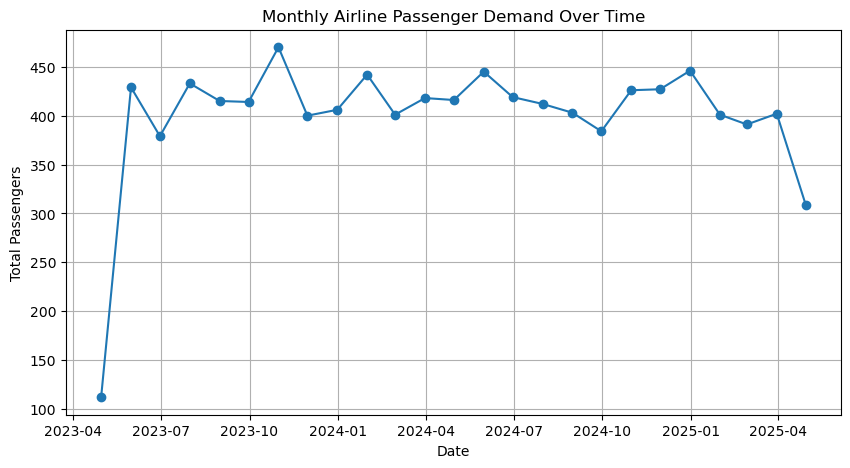

In [2]:
# Step 3: Data Preparation

import pandas as pd
import matplotlib.pyplot as plt

# Ensure Departure_Time is in datetime format
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])

# Create a daily passenger count (assuming each Passenger_ID = one passenger)
daily_passengers = (
    df.groupby(df['Departure_Time'].dt.date)
    .agg({'Passenger_ID': 'count'})
    .rename(columns={'Passenger_ID': 'Total_Passengers'})
    .reset_index()
)

# Convert 'Departure_Time' to datetime for plotting and resampling
daily_passengers['Departure_Time'] = pd.to_datetime(daily_passengers['Departure_Time'])

# Set as time series index
daily_passengers.set_index('Departure_Time', inplace=True)

# Resample to get monthly totals
monthly_passengers = daily_passengers['Total_Passengers'].resample('M').sum()

# Preview data
print("Daily passengers:\n", daily_passengers.head())
print("\nMonthly passengers:\n", monthly_passengers.head())

# Plot passenger trends
plt.figure(figsize=(10,5))
plt.plot(monthly_passengers, marker='o')
plt.title("Monthly Airline Passenger Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.show()


## Exploratory Data Analysis (EDA)

In this step, we explore the data to identify patterns, trends, and relationships between variables.  
Our main goals are to:
- Visualize overall passenger trends over time  
- Detect seasonality or recurring patterns  
- Compare demand across airlines  
- Examine factors like price, delay, and travel purpose that may influence demand


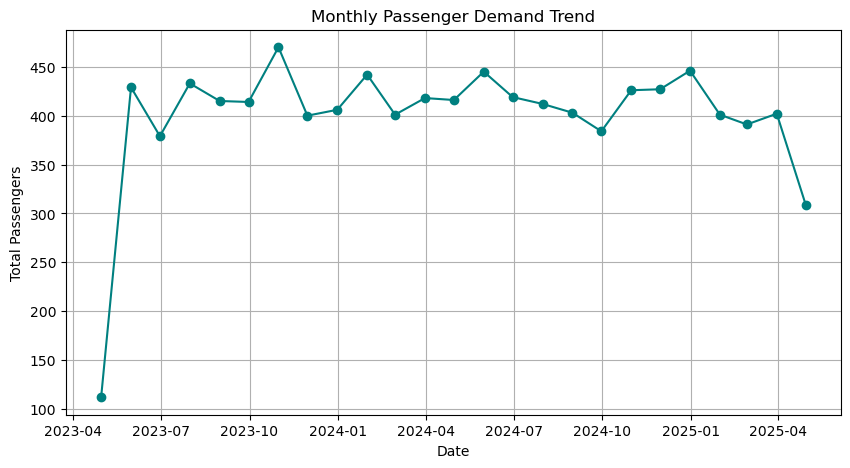

C:\Users\hp\AppData\Local\Temp\ipykernel_1608\2289390132.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.index, y=airline_counts.values, palette="coolwarm")


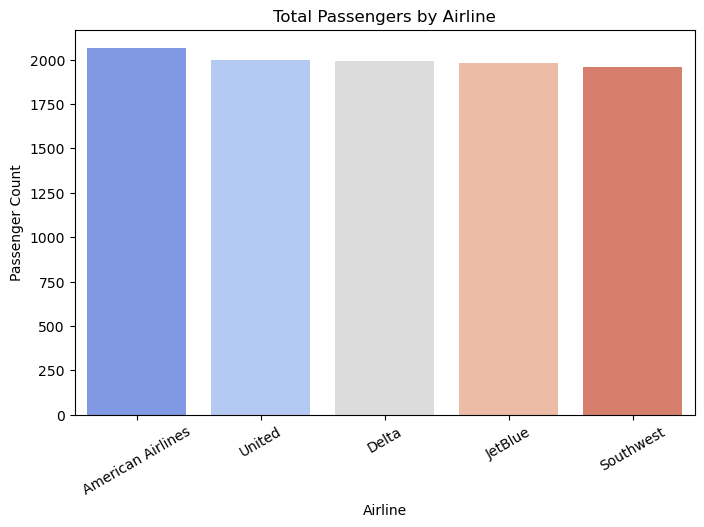

C:\Users\hp\AppData\Local\Temp\ipykernel_1608\2289390132.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Airline', y='Price_USD', estimator='mean', palette="viridis")


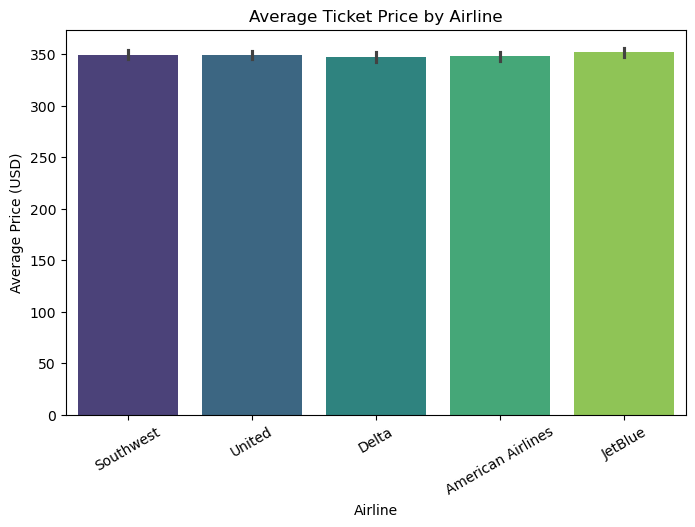

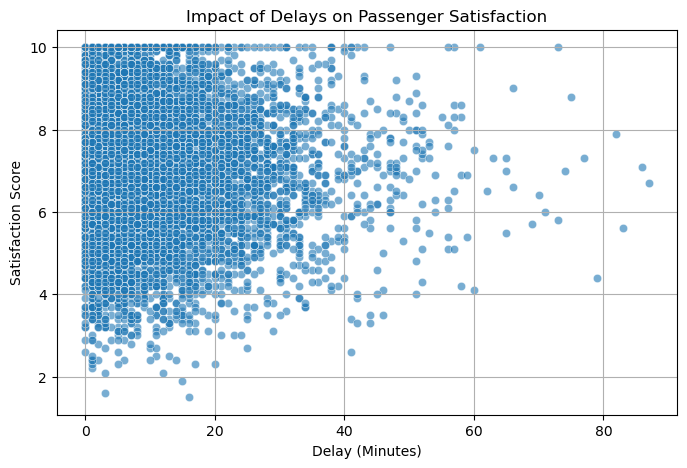

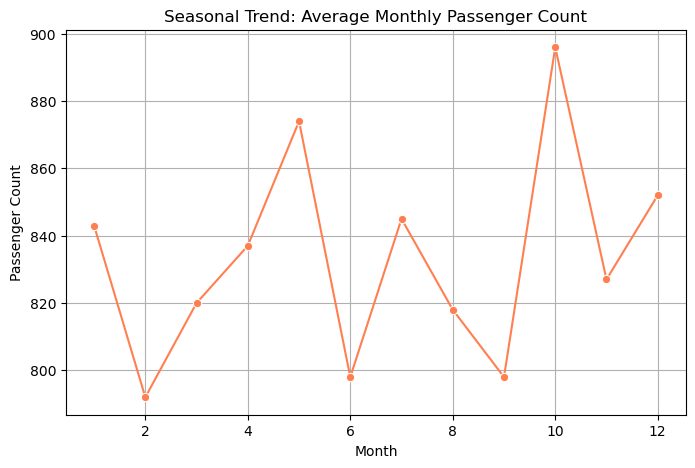

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#⃣ Overall Passenger Trend (Monthly)
plt.figure(figsize=(10,5))
plt.plot(monthly_passengers, color='teal', marker='o')
plt.title("Monthly Passenger Demand Trend")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.show()

# Passenger Volume by Airline
plt.figure(figsize=(8,5))
airline_counts = df['Airline'].value_counts()
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette="coolwarm")
plt.title("Total Passengers by Airline")
plt.xlabel("Airline")
plt.ylabel("Passenger Count")
plt.xticks(rotation=30)
plt.show()

# Average Ticket Price by Airline
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Airline', y='Price_USD', estimator='mean', palette="viridis")
plt.title("Average Ticket Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=30)
plt.show()

# Relationship: Flight Delay vs Passenger Satisfaction
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Delay_Minutes', y='Flight_Satisfaction_Score', alpha=0.6)
plt.title("Impact of Delays on Passenger Satisfaction")
plt.xlabel("Delay (Minutes)")
plt.ylabel("Satisfaction Score")
plt.grid(True)
plt.show()

# Seasonal Trend by Month
plt.figure(figsize=(8,5))
monthly_trend = df.groupby(df['Departure_Time'].dt.month)['Passenger_ID'].count()
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='coral')
plt.title("Seasonal Trend: Average Monthly Passenger Count")
plt.xlabel("Month")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.show()


### Insights
- The **monthly trend chart** shows clear patterns of increase and decrease in passenger demand, suggesting **seasonality**.  
- **Airline comparison** reveals which carriers attract the most passengers.  
- The **average price per airline** highlights pricing strategy differences among airlines.  
- The **delay vs satisfaction scatter plot** indicates that longer delays typically lead to lower passenger satisfaction.  
- The **monthly seasonality chart** shows high travel months (likely holidays) and low months (off-peak periods).

## Time Series Modeling & Forecasting

In this step, we will apply time series forecasting models to predict future passenger demand.  
We will:
1. Split the data into training and testing sets.  
2. Build and evaluate statistical models like **ARIMA** and **SARIMA**.  
3. Optionally use **Prophet** for more intuitive trend and seasonality modeling.  
4. Compare model performance using error metrics such as RMSE and MAE.


C:\Users\hp\AppData\Local\Temp\ipykernel_1608\1992308594.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_passengers = monthly_passengers.asfreq('M')
C:\Users\hp\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Evaluation Metrics:
MAE: 44.26
RMSE: 57.22


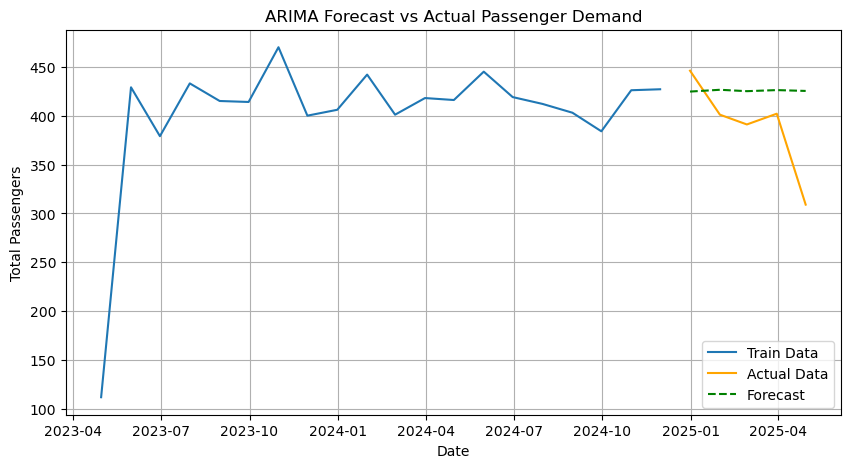

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure the monthly_passengers series is sorted and continuous
monthly_passengers = monthly_passengers.asfreq('M')

# Split into train (80%) and test (20%)
train_size = int(len(monthly_passengers) * 0.8)
train, test = monthly_passengers[:train_size], monthly_passengers[train_size:]

# Fit ARIMA model (p, d, q parameters can be tuned)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast the test period
forecast = model_fit.forecast(steps=len(test))

# Evaluate model performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(train, label='Train Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title("ARIMA Forecast vs Actual Passenger Demand")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.legend()
plt.grid(True)
plt.show()
